## importing the needed packages

In [206]:
import pandas as pd;
import numpy as np;
import sklearn as sk;
import matplotlib as mtl;
import matplotlib.pyplot as plt

## readind the data set

In [207]:
data_1=pd.read_excel("../Data_Train.xlsx")
data_2=pd.read_excel("../Data_Train.xlsx")

In [208]:
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


now lets deal with the missing values in the data

In [209]:
#to get a quick overview of the dataset
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [210]:
#from the info itself it is clear that route,totalstops hav some missinf values.Lets get a clear picture
data_1.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [211]:
#the isnull() function return true if the data is missing,else false,We can use sum() to get the number of mssing values as:
data_1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [212]:
#we see route and total stops have one missing values.And a common practice is that if the missing value percentage is less than 5 you can delete those values
#just check the row which has the missing values
data_1[data_1['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [213]:
#observe this is the row where route and totalstops are have missinf values.So lets drop this row
data_1.dropna(inplace=True)

In [214]:
data_1.info()
#now we can observe there is no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


## Data Preprocessing

In [215]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [216]:
#observe the data_of_journey,arrivaltime,departure time is of object data type.But they must be of  datetime data type.So lets create a function to convert all these three coulmns datatype to datetime

def convert_to_dt(col):
    data_1[col]=pd.to_datetime(data_1[col])

In [217]:
#now us the function to convert those three

for i in ['Date_of_Journey','Arrival_Time','Dep_Time']:
    convert_to_dt(i)

C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_11048\919186638.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_1[col]=pd.to_datetime(data_1[col])
C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_11048\919186638.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_1[col]=pd.to_datetime(data_1[col])
C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_11048\919186638.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_1[col]=pd.to_datetime(data_1[col])


In [218]:
data_1.info()
#niw we can see the datatype has been changed to datetime

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [219]:
#now the date_of_journey column have dd/mm/yyyy format.which is not undertstandable to machine.So we must divide the datacolumn to date,month and year

#to include new column with name day
data_1['day_of_journey']=data_1['Date_of_Journey'].dt.day

In [220]:
#to include new column with month 
data_1['month_of_journey']=data_1['Date_of_Journey'].dt.month

In [221]:
#to incude new column with year
data_1['year_of_journey']=data_1['Date_of_Journey'].dt.year

In [222]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  object        
 1   Date_of_Journey   10682 non-null  datetime64[ns]
 2   Source            10682 non-null  object        
 3   Destination       10682 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10682 non-null  datetime64[ns]
 6   Arrival_Time      10682 non-null  datetime64[ns]
 7   Duration          10682 non-null  object        
 8   Total_Stops       10682 non-null  object        
 9   Additional_Info   10682 non-null  object        
 10  Price             10682 non-null  int64         
 11  day_of_journey    10682 non-null  int32         
 12  month_of_journey  10682 non-null  int32         
 13  year_of_journey   10682 non-null  int32         
dtypes: datetime64[ns](3), int32

In [223]:
#now we have the column with day,month and year
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-29 05:50:00,2024-06-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-29 18:05:00,2024-06-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-29 16:50:00,2024-06-29 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [224]:
#now we must do the data cleaning process for deptime and arrivaltime.The date in those two columns must be deleted as it is of no importance because we have journey date details.So we have extract the hour and minute
#we make function for this

def hour_and_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_min']=df[col].dt.minute

In [225]:
for i in ['Dep_Time','Arrival_Time']:
    hour_and_min(data_1,i)

In [226]:
#now we ahve created columns for time and minutes
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10682 non-null  object        
 1   Date_of_Journey    10682 non-null  datetime64[ns]
 2   Source             10682 non-null  object        
 3   Destination        10682 non-null  object        
 4   Route              10682 non-null  object        
 5   Dep_Time           10682 non-null  datetime64[ns]
 6   Arrival_Time       10682 non-null  datetime64[ns]
 7   Duration           10682 non-null  object        
 8   Total_Stops        10682 non-null  object        
 9   Additional_Info    10682 non-null  object        
 10  Price              10682 non-null  int64         
 11  day_of_journey     10682 non-null  int32         
 12  month_of_journey   10682 non-null  int32         
 13  year_of_journey    10682 non-null  int32         
 14  Dep_Time_ho

In [227]:
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-29 05:50:00,2024-06-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-29 18:05:00,2024-06-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-29 16:50:00,2024-06-29 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [228]:
#now we can drop the dep_time and arrivltime columns
data_1.drop(['Dep_Time','Arrival_Time'],axis=1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


## Now lets do the data analysis

In [229]:
#for safety lets store the cleaned data to another variable
data_cleaned=data_1

In [230]:
#now lets think in this lineo f way.When will the most of the flight will take off.You can go with to check the takeof number in seasons,in certain year interval.But lets start from the basics.Lets check the takeoff numbe in morning,evening,night etc
#for that we must derive it from the dep_time_hour column
#lets create funcion for that

def flight_daycount(x):
    if(x>4 and x<=8 ):
        return "early morning"
    elif (x>8 and x<=12):
        return "morning"
    elif (x>12 and x<=16):
          return "noon"
    elif (x>16 and x<=20):
         return "evening"
    elif (x>20 and x<=24):
         return "night"
    else:
         return "late night"



In [231]:
#now lets apply this fuunction in out departure time 
flightcount=data_1['Dep_Time_hour'].apply(flight_daycount)
flightcount

0                night
1        early morning
2              morning
3              evening
4                 noon
             ...      
10678          evening
10679          evening
10680    early morning
10681          morning
10682          morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [232]:
#now let take a count of this
flightcountplot=flightcount.value_counts()
flightcountplot

Dep_Time_hour
early morning    2880
evening          2357
morning          2209
noon             1731
night            1040
late night        465
Name: count, dtype: int64

In [233]:
#now lets plot it with suitable chart.I prefer bar chart here
#flightcountplot.iplot(kind="bar",color="red")


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


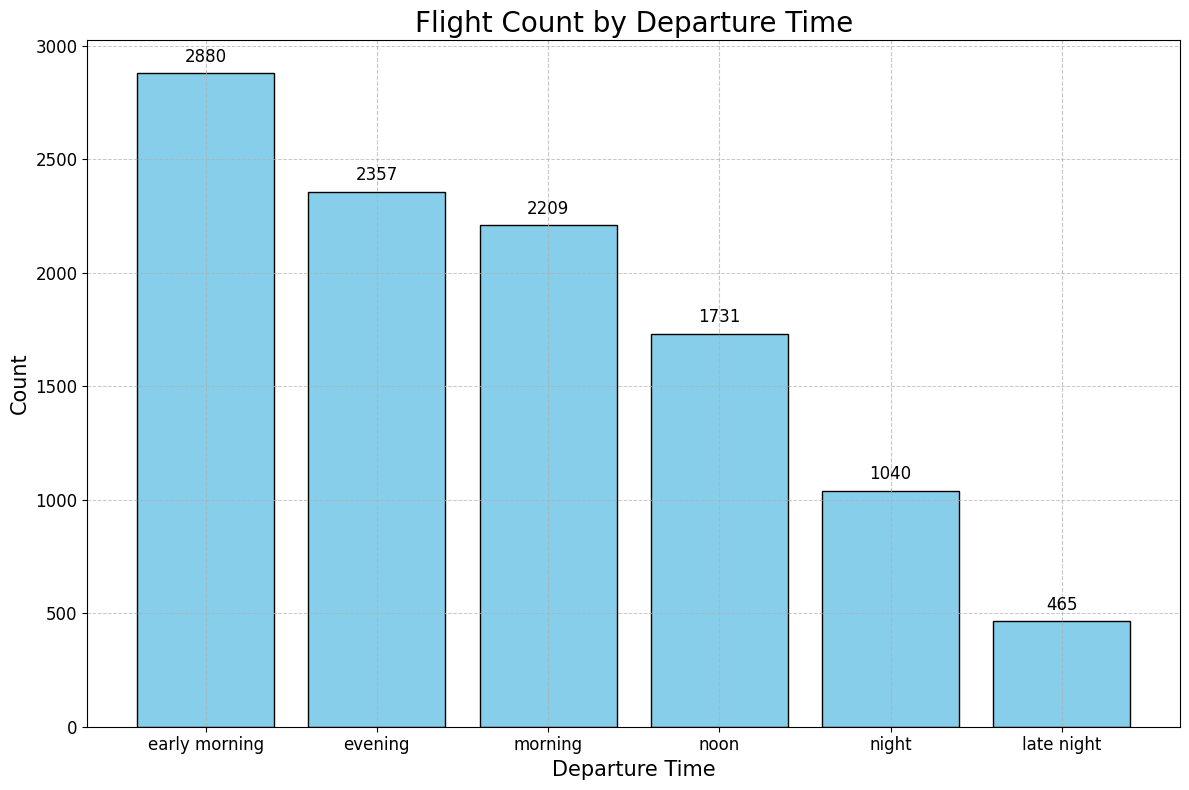

In [234]:
#if you want to make the charts more interactive then follow the codes.else just skip it.

%pip install matplotlib mplcursors
import matplotlib.pyplot as plt
import mplcursors
import pandas as pd

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(flightcountplot.index, flightcountplot.values, color='skyblue', edgecolor='black')

# Add title and labels
ax.set_title('Flight Count by Departure Time', fontsize=20)
ax.set_xlabel('Departure Time', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', fontsize=12)

# Add hover functionality to display counts
cursor = mplcursors.cursor(bars, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f'Count: {int(sel.target[1])}'))

# Customize ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [235]:
#now analyse the duaration column.Some have h and minute but some data have only minute.So lets clean it
#we must convert all the data in [hour,minute fromat].So lets design a function

def duartion_formating(x):
    if 'h' not in x:
        x='0h' + ' ' + x
    elif 'm' not in x:
        x=x + ' ' + '0m'
    
    return x

In [236]:
durationformat=data_1['Duration'].apply(duartion_formating)
durationformat

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [237]:
#now lets update the duration column

data_1['Duration']=durationformat

In [238]:
data_1['Duration']
#Now the duration is also standardized

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [239]:
#now we look at the departure time,minute etc they doesnt have any h or m with them.So lets try to convert this duartion by removing the h and m 

#for that we use split function.using space as the demiliter we can split the duration into two.and using the array indexing we can extract the say 2 from h and 50 from m

data_1['Duration_hours']=data_1['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1])) #this to etxract number from h and make it int type
data_1['Duration_minutes']=data_1['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1])) #this is to extract number from m and make it int type
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-29 05:50:00,2024-06-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-29 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-29 18:05:00,2024-06-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-29 16:50:00,2024-06-29 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [240]:
#now we are going to check whether the duaration can impact the cost
#for that for the  convenince we are going to  convert the duaration_time into minutes.
data_1['Duration_in_minutes']=data_1['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m',"*1").apply(eval)

In [241]:
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,day_of_journey,month_of_journey,year_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Duration_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-29 05:50:00,2024-06-29 13:15:00,7h 25m,2 stops,No info,...,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-29 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-29 18:05:00,2024-06-29 23:30:00,5h 25m,1 stop,No info,...,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-29 16:50:00,2024-06-29 21:35:00,4h 45m,1 stop,No info,...,1,3,2019,16,50,21,35,4,45,285


In [242]:
 #now lets plot a regression line to check whether there is any relation exist between the durtion and the cost
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='Duration_in_minutes', ylabel='Price'>

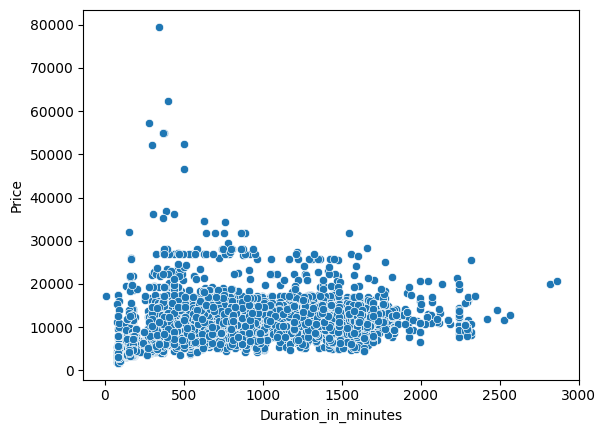

In [243]:
import seaborn as sns
sns.scatterplot(x="Duration_in_minutes",y="Price",data=data_1)

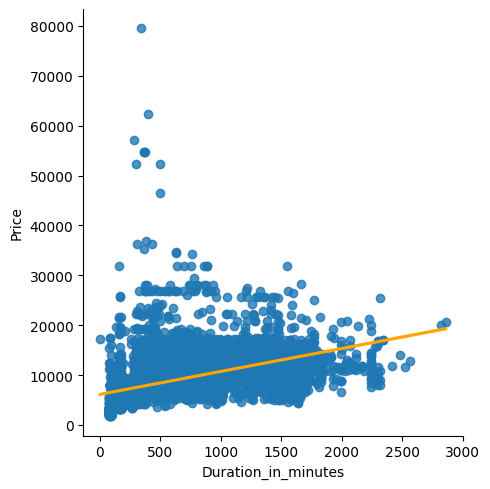

In [244]:
import matplotlib.pyplot as plt
sns.lmplot(x='Duration_in_minutes', y='Price', data=data_1,line_kws={'color': 'orange'})
#the orange or yellow color is the regression line.

from the regression line observation we can say that price and duration are direclt proportiona as the duration increases,price also increase. You can add the number of stops also to this plot and observe.

<Axes: xlabel='Duration_in_minutes', ylabel='Price'>

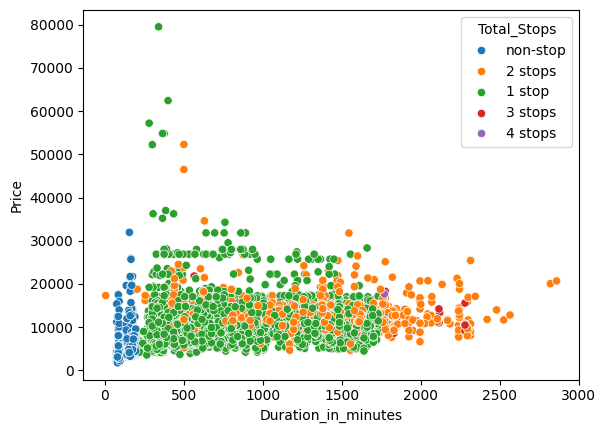

In [245]:
sns.scatterplot(x="Duration_in_minutes",y="Price", hue='Total_Stops',data=data_1)

observe that for non_stops slight increase in duration results in big change in price.And as the number of stops increases the duration definitely increases and we cannot say the price change related to number of stops in 2 stop

# now we are going some more deep.Lets say we need to find the most used route ny jet airways

In [246]:
data_1[data_1['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

from the data it is clear that the top 10 ways in which the airline jet airway is mostly servicing


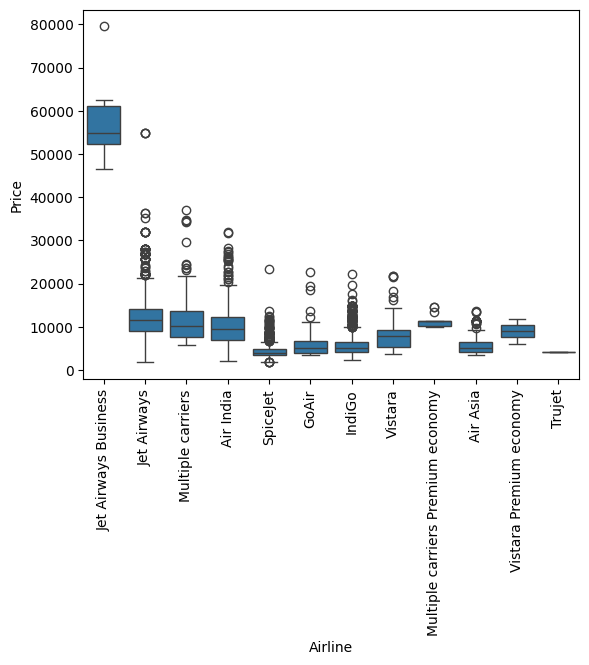

In [247]:
#now we use a boxplot
sns.boxplot(x='Airline',y='Price',data=data_1.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical") #or else the y labels will be overlapped
plt.show()


for jetairways the 50% of priice ranges are between around 5k to 6k.That is 25% of price range is below 5K and other 25%is bove 6k

## now we move on to feature encoding

In [248]:
#here we feature encode the sources that is the places like newdelhi,kochi,chennai etc.We use a one-hot encoding technique for this.
#lets see how many unique values of source columns are there
data_1['Source'].unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [249]:
data_1['Source'].unique().shape
#ther are 5 unique values

(5,)

In [250]:
#lets categorise the all columns into two types as we know,the object datatype and int datatype

#catergorical comuns are storeed in this variable
cat_col = [col for col in data_1.columns if data_1[col].dtype=="object"]
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [251]:
#the numerical columns list are store in this
num_col = [col for col in data_1.columns if data_1[col].dtype!="object"]
num_col

['Date_of_Journey',
 'Dep_Time',
 'Arrival_Time',
 'Price',
 'day_of_journey',
 'month_of_journey',
 'year_of_journey',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_minutes',
 'Duration_in_minutes']

In [252]:
#this will do the one-hot encoding by iterating through the unqiue coluumns sources and after entering into the iteration it will search Iin source column and if they are identified then a to ther coulumn 1 is added else 0

for sub_cat in data_1['Source'].unique():
    data_1['Source_' + sub_cat]=data_1['Source'].apply(lambda x: 1 if x==sub_cat else 0)


In [253]:
data_1.head()
#feature encoding is done on the 'Source' column


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Duration_in_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-29 05:50:00,2024-06-29 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-29 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-29 18:05:00,2024-06-29 23:30:00,5h 25m,1 stop,No info,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-29 16:50:00,2024-06-29 21:35:00,4h 45m,1 stop,No info,...,21,35,4,45,285,1,0,0,0,0


In [254]:
#now lets move to the 'Airline' column

data_1['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [255]:
data_1['Airline'].unique().shape

(12,)

there are 12 unique values in the 'Airline' column.It is not effecient to use one-hot encoding in this.Because the adding extra 12 column is not preferrable.S o here we use target guided encoding.

Target guided encoding is a technique in which the mean is calculated for each unique values based on another clumn.Here we calculate the mean of pices of all airlines.They are sorted in ascending order or descending .THese sorted order are indexed adn that indexx number is their corresponding feature encoding number.Lets see

#



In [256]:
airlines_mean=data_1.groupby(['Airline'])['Price'].mean().sort_values(ascending=True)
airlines_mean


Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [257]:
#now we can index this just by using index method
airlines_mean=data_1.groupby(['Airline'])['Price'].mean().sort_values(ascending=True).index
airlines_mean


Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [258]:
#now lets convert this list into dictionary with key value pairs with key as the name of airline and value as the indexing number in their list
airlines_encoding_dictionary={key:index for index,key in enumerate(airlines_mean,0)}
airlines_encoding_dictionary

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [259]:
#now lets map it with the airline column in original data
data_1['Airline']=data_1['Airline'].map(airlines_encoding_dictionary)
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Duration_in_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-29 05:50:00,2024-06-29 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-29 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-29 18:05:00,2024-06-29 23:30:00,5h 25m,1 stop,No info,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-29 16:50:00,2024-06-29 21:35:00,4h 45m,1 stop,No info,...,21,35,4,45,285,1,0,0,0,0


Now the Arilines are also feature encoded.We shall do this for all the object datatypes.Lets look to Destination column

In [260]:
data_1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [261]:

#but delhi and new delhi are same
data_1.replace({'Destination': {'New Delhi': 'Delhi'}}, inplace=True)

In [262]:
#her delhi and new delhi are same 
data_1['Destination'].nunique()

5

In [263]:
#there are 6 unique values.So lets do the same target encoding with the help of price mean 
Destination_mean=data_1.groupby(['Destination'])['Price'].mean().sort_values()
Destination_mean

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         8017.464269
Banglore      9158.389411
Cochin       10540.113536
Name: Price, dtype: float64

In [264]:
Destination_mean=data_1.groupby(['Destination'])['Price'].mean().sort_values().index
Destination_mean

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [265]:
#now lets convert this inti dictionary
Destination_dict={key:index for index,key in enumerate(Destination_mean,0)}
Destination_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [266]:
#now just map it with the original data
data_1['Destination']=data_1['Destination'].map(Destination_dict)
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Duration_in_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,2024-06-29 05:50:00,2024-06-29 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,2024-06-29 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,2024-06-29 18:05:00,2024-06-29 23:30:00,5h 25m,1 stop,No info,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,2024-06-29 16:50:00,2024-06-29 21:35:00,4h 45m,1 stop,No info,...,21,35,4,45,285,1,0,0,0,0


Now lets do feature encoding for totalstops column.Observe the totolstops is an ordinal values

In [267]:
data_1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [268]:
#lets turn this into a dictionary

number_of_stops={'non-stop':0, '2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}

In [269]:
#now lets map it with th original data
data_1['Total_Stops']=data_1['Total_Stops'].map(number_of_stops)
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Duration_in_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-29 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,2024-06-29 05:50:00,2024-06-29 13:15:00,7h 25m,2,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,2024-06-29 09:25:00,2024-06-10 04:25:00,19h 0m,2,No info,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,2024-06-29 18:05:00,2024-06-29 23:30:00,5h 25m,1,No info,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,2024-06-29 16:50:00,2024-06-29 21:35:00,4h 45m,1,No info,...,21,35,4,45,285,1,0,0,0,0


Now check the importance of additional info column

In [270]:
data_1['Additional_Info'].value_counts()/len(data_1)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [271]:
data_1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day_of_journey', 'month_of_journey',
       'year_of_journey', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_hours', 'Duration_minutes',
       'Duration_in_minutes', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [272]:
#1.see the 78% of data have no info in it.So lets that columns as it is of no importance.You can do it from the Begining of the project itlsef
#check for other useless columns too

#2.observe we have extracted the date,month and year from 'date of journey'.So it is not needed anymore

#3.Duration of totalminutes also is of no importance now

#4.Source is also useless as we had done one-hot feature encoding

#so lets drop these useless columns

data_1.drop(columns=['Date_of_Journey','Additional_Info','Duration_in_minutes','Source'],axis=1,inplace=True)


In [273]:
#now lets check for journey year
data_1['year_of_journey'].unique()

array([2019])

In [274]:
#see there is only ine value .No varation so it is of no use for us.So lets drop that column too
data_1.drop('year_of_journey', axis=1, inplace=True)

In [275]:
data_1.columns

Index(['Airline', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'day_of_journey',
       'month_of_journey', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_minutes', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [276]:
#and also route is also of no importnace as we have the number of stops column which is related to the route column
#the column duration is also of no importnace .So lets replace it also
data_1.drop(columns=['Duration'], inplace=True)

In [277]:
data_1.drop(columns=['Route'], inplace=True)

In [278]:
data_1.columns

Index(['Airline', 'Destination', 'Dep_Time', 'Arrival_Time', 'Total_Stops',
       'Price', 'day_of_journey', 'month_of_journey', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Duration_hours', 'Duration_minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')